# A simple beat sequencer #
## CSC475/571 ##
### George Tzanetakis (with help from Jordie Shier) ###

This notebook shows how to create an amplitude envelope as well as how a simple beat sequencer using 3 basic drum sounds can be created. The goal is to gain familiarity with basic audio programming and Python and prepare for the course assignments. 


In [1]:
import soundfile as sf
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
chord, sr = librosa.load('./audio/chord.wav', sr=44100)
ipd.Audio(chord, rate=sr)

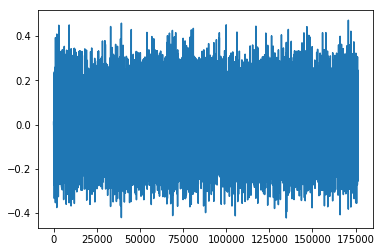

In [3]:
plt.plot(chord)

In [4]:
def make_envelope(attack_ms, release_ms, sr):
    
    # Create an attack envelope
    attack_samples = (attack_ms / 1000) * sr
    env_attack = np.linspace(0, 1, int(attack_samples))
    
    # Create a release envelope
    release_samples = (release_ms / 1000) * sr
    env_release = np.linspace(1, 0, int(release_samples))
    
    return np.hstack((env_attack, env_release))

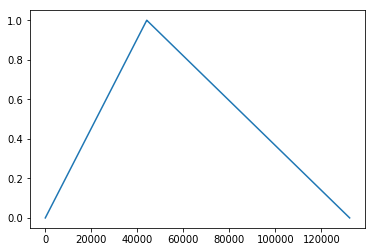

In [5]:
# Create an envelope and plot the shape of it
envelope = make_envelope(1000, 2000, sr)
plt.plot(envelope)

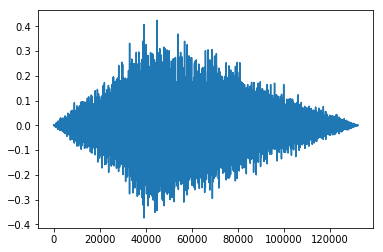

In [6]:
# Apply envelope to signal -- the envelope is shorter than the chord so we'll trim the chord
enveloped_chord = chord[0:len(envelope)] * envelope
plt.plot(enveloped_chord)

In [7]:
ipd.Audio(enveloped_chord, rate=sr)

#### 3. Sequence a simple rhythm

Load in a few audio files and create an audio signal that combines them in time to create a simple rhythm or drum beat. I've included three different drum sounds in the attachment that would work well for this, or find your own. Freesound is a good place to find different sounds to experiment with - https://freesound.org/

In [8]:
sr = 44100
kick, _ = librosa.load('./audio/kick.wav')
snare, _ = librosa.load('./audio/snare.wav')
hat, _ = librosa.load('./audio/hihat.wav')

In [9]:
# Lets create a 2-bar audio sequence at 120 beats per minute
bpm = 80      # beats per minute
bps = bpm / 60 # beats per second

beats_per_bar = 4
num_bars = 2

# Define a quarter note length and sixteenth note length in samples
quarter_len_samples = int(sr / bps)
sixteenth = int(quarter_len_samples / 4)

# Beat
beat_signal = np.zeros(quarter_len_samples * beats_per_bar * num_bars)

In [10]:
# Create a kick pattern
kick_pattern = [1,0,0,0,
                1,0,0,0,
                1,0,0,0,
                1,0,0,1,
                1,0,0,1,
                0,0,1,0,
                1,0,0,1,
                0,0,1,0]

# place the samples at the locations corresponding 
# to the pattern to create the beat_signal 
for i, val in enumerate(kick_pattern):
    if val == 1:
        # The length is either the full kick sample, or until the end of the beat signal
        length = min(len(kick), len(beat_signal) - sixteenth*i)
        beat_signal[sixteenth*i:(sixteenth*i) + length] = kick[:length]

In [11]:
ipd.Audio(beat_signal, rate=sr)

In [12]:
# Create a snare pattern
snare_pattern = [0,0,0,0,
                 1,0,0,0,
                 0,0,0,0,
                 1,0,0,0,
                 0,0,0,0,
                 1,0,0,0,
                 0,0,0,0,
                 1,0,0,0]

for i, val in enumerate(snare_pattern):
    if val == 1:
        length = min(len(snare), len(beat_signal) - sixteenth*i)
        beat_signal[sixteenth*i:(sixteenth*i) + length] += snare[:length]

In [13]:
ipd.Audio(beat_signal, rate=sr)

In [14]:
# Create a hihat pattern in sixteenth notes
hihat_pattern = [0,0,1,0,
                 0,0,1,0,
                 0,0,1,0,
                 0,0,1,0,
                 1,1,1,1,
                 1,0,1,0,
                 0,0,1,0,
                 1,0,1,0]

for i, val in enumerate(hihat_pattern):
    if val == 1:
        length = min(len(hat), len(beat_signal) - sixteenth*i)
        beat_signal[sixteenth*i:(sixteenth*i) + length] += hat[:length]

In [15]:
ipd.Audio(beat_signal, rate=sr)

In [16]:
# Why not add our enveloped chord in there?
for i in range(len(beat_signal)):
    beat_signal[i] += enveloped_chord[i % len(enveloped_chord)]

In [17]:
ipd.Audio(beat_signal, rate=sr)